In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')

frames = [df1, df2]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
# Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
df.head()

# Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')

# Change date data type
df_modified["DTYYYYMMDD"] = pd.to_datetime(df_modified["DTYYYYMMDD"], format='%Y%m%d')
df_modified.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Volume
0,AAV,2021-07-30,12.4,12.4,12.1,12.4,166400
1,ABT,2021-07-30,26.0,27.2,26.0,27.1,1207
2,ACM,2021-07-30,2.3,2.4,2.3,2.4,592463
3,ADC,2021-07-30,21.5,21.5,21.5,21.5,0
4,ALT,2021-07-30,12.7,12.7,12.7,12.7,0


In [5]:
#Pivot the table
pricing = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
pricing.head()

Ticker,AAA,AAM,AAT,AAV,ABS,ABT,ACB,ACC,ACL,ACM,...,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20,YBM,YEG
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2012-01-03,2.950,8.336,NaN,NaN,NaN,13.371,5.760,5.259,5.411,NaN,...,NaN,15.657,1.707,1.224,3.521,14.96,3.1,NaN,NaN,NaN
2012-01-04,2.976,8.487,NaN,NaN,NaN,13.409,5.760,5.289,5.349,NaN,...,NaN,15.657,1.707,1.269,3.521,14.96,2.9,NaN,NaN,NaN
2012-01-05,2.950,8.374,NaN,NaN,NaN,13.669,5.939,5.053,5.349,NaN,...,NaN,15.657,1.666,1.269,3.298,14.96,2.9,NaN,NaN,NaN
2012-01-06,2.925,8.374,NaN,NaN,NaN,13.036,5.819,5.289,5.349,NaN,...,NaN,15.657,1.626,1.269,3.164,14.96,2.8,NaN,NaN,NaN
2012-01-09,2.950,8.374,NaN,NaN,NaN,13.036,5.790,5.289,5.349,NaN,...,NaN,15.657,1.666,1.291,3.030,14.96,2.8,NaN,NaN,NaN


In [6]:
0 in pricing.values

True

In [7]:
import numpy as np
pricing.replace(0, np.nan, inplace=True)

In [8]:
0 in pricing.values

False

In [9]:
unclean_pricing = pricing.copy()

In [10]:
%%HTML
<h1>Filter Pricing</h1>

In [11]:
%%HTML
<h3>Here we only consider pricing between 01/01/2015 and 31/12/2018 (a total of 999 days)</h3>

In [12]:
import datetime
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date(2018, 12, 31)
pricing = pricing.loc[start_date:end_date]
pricing.head()

Ticker,AAA,AAM,AAT,AAV,ABS,ABT,ACB,ACC,ACL,ACM,...,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20,YBM,YEG
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.223,7.485,NaN,NaN,NaN,31.261,4.991,14.233,4.147,NaN,...,NaN,11.92,4.526,6.860,11.637,82.363,5.2,NaN,NaN,NaN
2015-01-06,6.314,7.433,NaN,NaN,NaN,31.261,5.056,13.758,4.147,NaN,...,NaN,11.92,4.744,6.890,11.637,76.315,5.4,NaN,NaN,NaN
2015-01-07,6.539,7.485,NaN,NaN,NaN,30.968,5.121,13.370,4.328,NaN,...,NaN,11.92,4.799,6.978,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-08,6.404,7.537,NaN,NaN,NaN,32.137,5.154,13.370,4.328,NaN,...,NaN,11.92,4.799,7.508,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-09,6.269,7.069,NaN,NaN,NaN,33.890,5.187,14.060,4.292,NaN,...,NaN,11.92,4.908,7.508,11.637,73.431,5.4,NaN,NaN,NaN


In [13]:
%%HTML
<h1>Clean Data</h1>

In [14]:
pd.set_option('display.precision', 3)

In [15]:
#Check for missing values
pricing.isnull().values.any()

True

<AxesSubplot:>

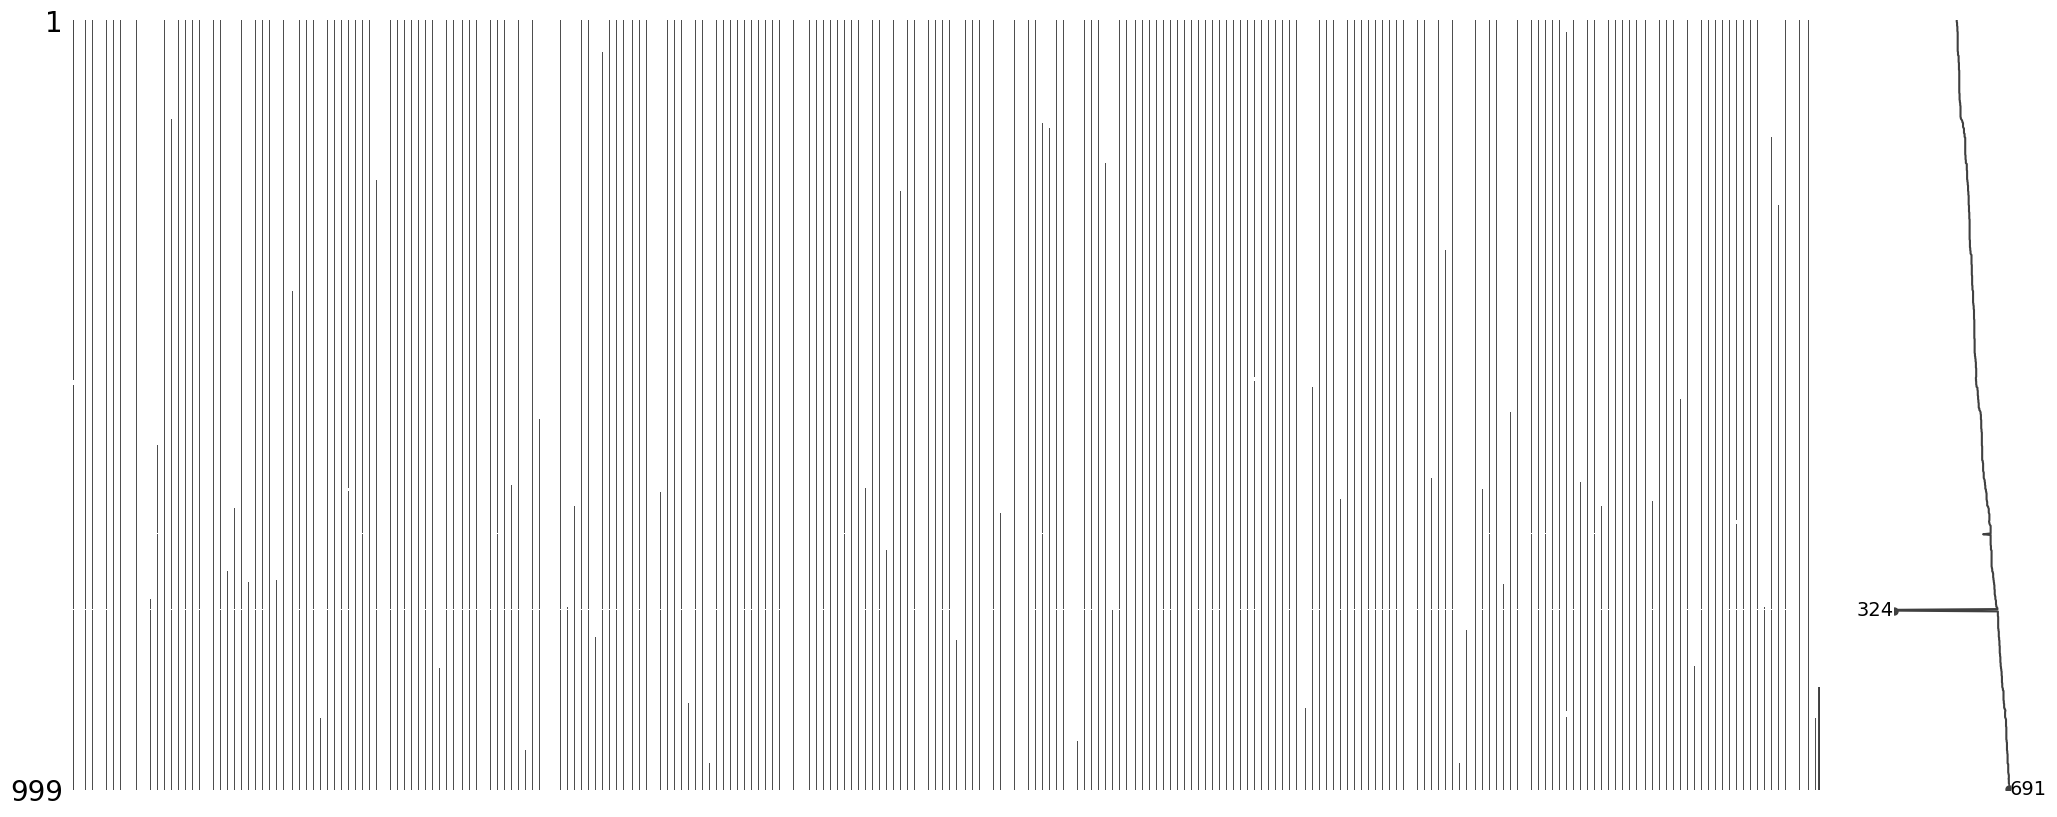

In [16]:
#Plot the missing value matrix
import missingno
missingno.matrix(pricing)

In [17]:
%%HTML
<h3>We shall remove all the columns with more than 20% of missing data</h3>

In [18]:
print('Pricing Shape before cleaning =', pricing.shape)

missing_percentage = pricing.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
pricing.drop(labels=dropped_list, axis=1, inplace=True)

print('Pricing Shape after cleaning =', pricing.shape)

Pricing Shape before cleaning = (999, 750)
Pricing Shape after cleaning = (999, 556)


In [19]:
#Fill the remaining missing values with already available values
pricing = pricing.fillna(method='ffill')
pricing = pricing.fillna(method='bfill')
# pricing.head()
print(pricing)

Ticker         AAA    AAM     ABT     ACB     ACC     ACL     ACM     ADC  \
DTYYYYMMDD                                                                  
2015-01-05   6.223  7.485  31.261   4.991  14.233   4.147  10.022   7.491   
2015-01-06   6.314  7.433  31.261   5.056  13.758   4.147  10.022   7.325   
2015-01-07   6.539  7.485  30.968   5.121  13.370   4.328  10.022   7.325   
2015-01-08   6.404  7.537  32.137   5.154  13.370   4.328  10.022   7.325   
2015-01-09   6.269  7.069  33.890   5.187  14.060   4.292  10.022   7.558   
...            ...    ...     ...     ...     ...     ...     ...     ...   
2018-12-24  13.040  9.014  36.541  13.710  13.221  13.201   0.700  11.034   
2018-12-25  12.776  9.117  34.629  13.615  13.221  12.365   0.700  11.034   
2018-12-26  12.776  9.186  33.609  13.568  13.221  12.429   0.800  11.034   
2018-12-27  13.128  9.048  35.946  13.899  13.221  12.858   0.700  11.034   
2018-12-28  12.952  9.186  34.161  13.993  13.221  12.858   0.700  11.034   

In [20]:
import numpy as np

#Calculate returns and create a data frame
returns = pricing.pct_change()

returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-06,0.015,-0.007,0.000,0.013,-0.033,0.000,0.0,-0.022,0.000,0.000,...,0.007,-0.062,-0.025,0.020,0.0,0.048,0.004,0.0,-7.343e-02,0.038
2015-01-07,0.036,0.007,-0.009,0.013,-0.028,0.044,0.0,0.000,0.000,0.016,...,0.000,0.057,-0.009,0.000,0.0,0.012,0.013,0.0,-3.704e-02,-0.019
2015-01-08,-0.021,0.007,0.038,0.006,0.000,0.000,0.0,0.000,-0.044,0.000,...,-0.015,-0.063,0.069,0.000,0.0,0.000,0.076,0.0,0.000e+00,0.000
2015-01-09,-0.021,-0.062,0.055,0.006,0.052,-0.008,0.0,0.032,0.036,0.016,...,0.007,0.000,0.032,0.019,0.0,0.023,0.000,0.0,-7.756e-04,0.019
2015-01-12,-0.029,0.059,-0.034,0.013,0.000,-0.008,0.0,0.000,0.018,-0.016,...,-0.007,-0.067,0.000,-0.050,0.0,-0.033,0.000,0.0,-1.463e-02,-0.037


In [21]:
returns = returns.reset_index()
returns = returns.drop(['DTYYYYMMDD'], axis=1)
returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
0,0.015,-0.007,0.000,0.013,-0.033,0.000,0.0,-0.022,0.000,0.000,...,0.007,-0.062,-0.025,0.020,0.0,0.048,0.004,0.0,-7.343e-02,0.038
1,0.036,0.007,-0.009,0.013,-0.028,0.044,0.0,0.000,0.000,0.016,...,0.000,0.057,-0.009,0.000,0.0,0.012,0.013,0.0,-3.704e-02,-0.019
2,-0.021,0.007,0.038,0.006,0.000,0.000,0.0,0.000,-0.044,0.000,...,-0.015,-0.063,0.069,0.000,0.0,0.000,0.076,0.0,0.000e+00,0.000
3,-0.021,-0.062,0.055,0.006,0.052,-0.008,0.0,0.032,0.036,0.016,...,0.007,0.000,0.032,0.019,0.0,0.023,0.000,0.0,-7.756e-04,0.019
4,-0.029,0.059,-0.034,0.013,0.000,-0.008,0.0,0.000,0.018,-0.016,...,-0.007,-0.067,0.000,-0.050,0.0,-0.033,0.000,0.0,-1.463e-02,-0.037


In [22]:
returns_transpose = returns.transpose()
returns_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,988,989,990,991,992,993,994,995,996,997
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0.015,0.036,-0.021,-0.021,-0.029,0.022,0.000,-0.007,0.000,-0.007,...,-0.021,-0.025,-0.029,0.016,-0.023,-0.023,-0.020,0.000,0.028,-0.013
AAM,-0.007,0.007,0.007,-0.062,0.059,-0.056,0.000,0.022,0.022,-0.021,...,-0.008,-0.054,-0.008,0.041,0.031,0.004,0.011,0.008,-0.015,0.015
ABT,0.000,-0.009,0.038,0.055,-0.034,0.018,0.035,0.000,0.000,0.000,...,0.000,-0.011,0.046,-0.042,-0.002,0.000,-0.052,-0.029,0.070,-0.050
ACB,0.013,0.013,0.006,0.006,0.013,0.025,-0.018,-0.019,0.000,0.013,...,-0.026,0.000,0.000,0.000,-0.007,-0.014,-0.007,-0.003,0.024,0.007
ACC,-0.033,-0.028,0.000,0.052,0.000,0.000,0.000,0.000,0.000,0.000,...,0.022,-0.024,0.000,0.000,0.063,0.000,0.000,0.000,0.000,0.000


In [23]:
%%HTML
<h1>Customized Features</h1>

In [24]:
%%HTML
<h3>We will be adding some fundamental values as well to make the model more robust</h3>

In [25]:
import numpy as np

#Calculate returns and create a data frame
mean_returns = pricing.pct_change().mean()*999 
mean_returns = pd.DataFrame(mean_returns)
mean_returns.columns = ['mean returns']

#Calculate the volatility
mean_returns['volatility'] = pricing.pct_change().std()*np.sqrt(999)
mean_returns.head()

,mean returns,volatility
Ticker,,
AAA,1.012,0.748
AAM,0.609,0.899
ABT,0.341,0.710
ACB,1.213,0.601
ACC,0.191,0.727


In [26]:
stacked_df = pd.concat([returns_transpose, mean_returns], axis=1)
stacked_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,mean returns,volatility
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0.015,0.036,-0.021,-0.021,-0.029,0.022,0.000,-0.007,0.000,-0.007,...,-0.029,0.016,-0.023,-0.023,-0.020,0.000,0.028,-0.013,1.012,0.748
AAM,-0.007,0.007,0.007,-0.062,0.059,-0.056,0.000,0.022,0.022,-0.021,...,-0.008,0.041,0.031,0.004,0.011,0.008,-0.015,0.015,0.609,0.899
ABT,0.000,-0.009,0.038,0.055,-0.034,0.018,0.035,0.000,0.000,0.000,...,0.046,-0.042,-0.002,0.000,-0.052,-0.029,0.070,-0.050,0.341,0.710
ACB,0.013,0.013,0.006,0.006,0.013,0.025,-0.018,-0.019,0.000,0.013,...,0.000,0.000,-0.007,-0.014,-0.007,-0.003,0.024,0.007,1.213,0.601
ACC,-0.033,-0.028,0.000,0.052,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.063,0.000,0.000,0.000,0.000,0.000,0.191,0.727


In [27]:
#Adding the industry
industry = pd.read_excel('./data/industry.xlsx', index_col=0)
industry.head()

#Adding the marketcap
marketcap = pd.read_excel('./data/marketcap.xlsx', index_col=0)
marketcap.head()

,Marketcap
Ticker,
AAA,Medium Cap
AAM,Micro Cap
AAT,Small Cap
AAV,Micro Cap
ABR,Micro Cap


In [28]:
merged_df = pd.merge(stacked_df, industry, on='Ticker', how = 'left').merge(marketcap, on='Ticker', how = 'left')
merged_df.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,mean returns,volatility,Industry,Marketcap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0.015,0.036,-0.021,-0.021,-0.029,0.022,0.000,-0.007,0.000,-0.007,...,-0.023,-0.023,-0.020,0.000,0.028,-0.013,1.012,0.748,containers_packaging,Medium Cap
AAM,-0.007,0.007,0.007,-0.062,0.059,-0.056,0.000,0.022,0.022,-0.021,...,0.031,0.004,0.011,0.008,-0.015,0.015,0.609,0.899,farming,Micro Cap
ABT,0.000,-0.009,0.038,0.055,-0.034,0.018,0.035,0.000,0.000,0.000,...,-0.002,0.000,-0.052,-0.029,0.070,-0.050,0.341,0.710,food_products,Small Cap
ACB,0.013,0.013,0.006,0.006,0.013,0.025,-0.018,-0.019,0.000,0.013,...,-0.007,-0.014,-0.007,-0.003,0.024,0.007,1.213,0.601,banking,Large Cap
ACC,-0.033,-0.028,0.000,0.052,0.000,0.000,0.000,0.000,0.000,0.000,...,0.063,0.000,0.000,0.000,0.000,0.000,0.191,0.727,building_materials_products,Small Cap


In [29]:
completed_df = merged_df.dropna(subset=['Industry', 'Marketcap'])
completed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,mean returns,volatility,Industry,Marketcap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0.015,0.036,-0.021,-0.021,-0.029,0.022,0.000,-0.007,0.000,-0.007,...,-0.023,-0.023,-0.020,0.000,0.028,-0.013,1.012,0.748,containers_packaging,Medium Cap
AAM,-0.007,0.007,0.007,-0.062,0.059,-0.056,0.000,0.022,0.022,-0.021,...,0.031,0.004,0.011,0.008,-0.015,0.015,0.609,0.899,farming,Micro Cap
ABT,0.000,-0.009,0.038,0.055,-0.034,0.018,0.035,0.000,0.000,0.000,...,-0.002,0.000,-0.052,-0.029,0.070,-0.050,0.341,0.710,food_products,Small Cap
ACB,0.013,0.013,0.006,0.006,0.013,0.025,-0.018,-0.019,0.000,0.013,...,-0.007,-0.014,-0.007,-0.003,0.024,0.007,1.213,0.601,banking,Large Cap
ACC,-0.033,-0.028,0.000,0.052,0.000,0.000,0.000,0.000,0.000,0.000,...,0.063,0.000,0.000,0.000,0.000,0.000,0.191,0.727,building_materials_products,Small Cap


In [30]:
return_cols = completed_df.columns[:998]
num_feature_cols = completed_df.columns[998:1000]
category_feature_cols = completed_df.columns[1000:]

return_data = completed_df[return_cols]
num_feature_data = completed_df[num_feature_cols]
category_feature_data = completed_df[category_feature_cols]

print(return_data)
print(num_feature_data)
print(category_feature_data)

          0      1      2          3      4      5      6      7      8    \
Ticker                                                                      
AAA     0.015  0.036 -0.021 -2.108e-02 -0.029  0.022  0.000 -0.007  0.000   
AAM    -0.007  0.007  0.007 -6.209e-02  0.059 -0.056  0.000  0.022  0.022   
ABT     0.000 -0.009  0.038  5.455e-02 -0.034  0.018  0.035  0.000  0.000   
ACB     0.013  0.013  0.006  6.403e-03  0.013  0.025 -0.018 -0.019  0.000   
ACC    -0.033 -0.028  0.000  5.161e-02  0.000  0.000  0.000  0.000  0.000   
...       ...    ...    ...        ...    ...    ...    ...    ...    ...   
VTH     0.020  0.000  0.000  1.925e-02 -0.050  0.033 -0.013 -0.013  0.033   
VTO     0.048  0.012  0.000  2.271e-02 -0.033  0.000  0.000  0.012  0.000   
VTV     0.004  0.013  0.076  0.000e+00  0.000 -0.016 -0.028  0.000  0.000   
WCS    -0.073 -0.037  0.000 -7.756e-04 -0.015  0.008  0.030 -0.023 -0.014   
WSS     0.038 -0.019  0.000  1.887e-02 -0.037  0.000 -0.019  0.020  0.019   

In [31]:
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 50
pca = PCA(n_components=50)
pca_components = pca.fit_transform(return_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(50)], index = return_data.index)
print(pca_df)

          PC1    PC2    PC3        PC4        PC5    PC6    PC7    PC8    PC9  \
Ticker                                                                          
AAA    -2.731 -2.087  0.148 -2.823e-02  2.820e-02 -0.059 -0.045 -0.016  0.024   
AAM    -2.708 -2.102 -0.159  2.929e-02  5.454e-02  0.027 -0.038  0.053  0.080   
ABT    -2.708 -2.064 -0.100  1.438e-02 -5.161e-03  0.009 -0.024 -0.037 -0.004   
ACB    -2.702 -2.090  0.210 -7.227e-04 -9.781e-02 -0.012 -0.111  0.022  0.013   
ACC    -2.764 -2.102 -0.046 -3.575e-02  1.508e-02 -0.027 -0.009 -0.020  0.007   
...       ...    ...    ...        ...        ...    ...    ...    ...    ...   
VTH    -2.708 -2.102 -0.068  2.868e-02  1.320e-02 -0.057  0.013 -0.014 -0.050   
VTO    -2.693 -2.116  0.031  4.095e-02  2.807e-04 -0.010  0.044 -0.053 -0.008   
VTV    -2.659 -2.134  0.024 -1.284e-02  2.294e-03  0.018 -0.048 -0.021  0.014   
WCS    -2.708 -2.133 -0.131  2.279e-02  2.238e-02  0.012  0.091  0.019  0.042   
WSS    -2.676 -2.070  0.125 

In [32]:
# Combine the PCA components with the additional feature columns
num_data = pd.concat([pca_df, num_feature_data], axis=1)
num_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,mean returns,volatility
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-2.731,-2.087,0.148,-2.823e-02,0.028,-0.059,-0.045,-0.016,0.024,0.002,...,-0.001,-0.021,0.058,-0.005,-0.008,-2.700e-02,0.035,0.004,1.012,0.748
AAM,-2.708,-2.102,-0.159,2.929e-02,0.055,0.027,-0.038,0.053,0.080,-0.020,...,0.048,-0.103,-0.033,-0.005,-0.030,3.838e-03,-0.083,0.067,0.609,0.899
ABT,-2.708,-2.064,-0.100,1.438e-02,-0.005,0.009,-0.024,-0.037,-0.004,-0.024,...,-0.022,0.015,0.007,0.028,-0.006,-9.076e-04,-0.031,-0.040,0.341,0.710
ACB,-2.702,-2.090,0.210,-7.227e-04,-0.098,-0.012,-0.111,0.022,0.013,0.027,...,-0.005,-0.012,0.024,0.017,-0.022,-7.282e-04,-0.033,0.042,1.213,0.601
ACC,-2.764,-2.102,-0.046,-3.575e-02,0.015,-0.027,-0.009,-0.020,0.007,0.001,...,0.010,-0.012,-0.044,-0.036,0.004,3.532e-02,-0.004,0.028,0.191,0.727


In [33]:
from sklearn import preprocessing
scaled_data = preprocessing.StandardScaler().fit_transform(num_data)

# Create a DataFrame for the PCA components
scaled_data_df = pd.DataFrame(scaled_data, columns=[f'SS{i+1}' for i in range(52)], index = return_data.index)
print(scaled_data_df)

          SS1    SS2    SS3    SS4    SS5    SS6    SS7    SS8    SS9   SS10  \
Ticker                                                                         
AAA    -0.044 -0.044  1.111 -0.313  0.331 -0.728 -0.566 -0.208  0.304  0.027   
AAM    -0.044 -0.044 -1.190  0.325  0.641  0.329 -0.480  0.680  1.031 -0.266   
ABT    -0.044 -0.043 -0.751  0.160 -0.061  0.116 -0.307 -0.471 -0.055 -0.312   
ACB    -0.044 -0.044  1.572 -0.008 -1.150 -0.155 -1.401  0.281  0.167  0.357   
ACC    -0.045 -0.044 -0.347 -0.397  0.177 -0.335 -0.112 -0.260  0.089  0.014   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
VTH    -0.044 -0.044 -0.509  0.318  0.155 -0.709  0.160 -0.177 -0.647  0.673   
VTO    -0.044 -0.045  0.233  0.455  0.003 -0.120  0.557 -0.670 -0.103 -0.494   
VTV    -0.043 -0.045  0.180 -0.143  0.027  0.217 -0.608 -0.265  0.183  0.351   
WCS    -0.044 -0.045 -0.981  0.253  0.263  0.144  1.147  0.242  0.548 -0.005   
WSS    -0.044 -0.044  0.936 -0.668 -0.60

In [34]:
category_feature_data = pd.get_dummies(category_feature_data, columns = ['Industry'])
category_feature_data = pd.get_dummies(category_feature_data, columns = ['Marketcap'])
category_feature_data.head()

,Industry_aerospace_products_parts,Industry_alcoholic_beverages_drinks,Industry_aluminum,Industry_audio_video_equipment,Industry_banking,Industry_biotechnology,Industry_building_materials_products,Industry_chemicals,Industry_clothing,Industry_clothing_retail,...,Industry_transportation_services,Industry_trucking,Industry_upstream_oil_gas,Industry_water_transport_shipping,Industry_water_utilities,Industry_wholesalers,Marketcap_Large Cap,Marketcap_Medium Cap,Marketcap_Micro Cap,Marketcap_Small Cap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ABT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ACB,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ACC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Combine the scaled data with the categorical feature columns
X = pd.concat([scaled_data_df, category_feature_data], axis=1)
X.head()

,SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9,SS10,...,Industry_transportation_services,Industry_trucking,Industry_upstream_oil_gas,Industry_water_transport_shipping,Industry_water_utilities,Industry_wholesalers,Marketcap_Large Cap,Marketcap_Medium Cap,Marketcap_Micro Cap,Marketcap_Small Cap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-0.044,-0.044,1.111,-0.313,0.331,-0.728,-0.566,-0.208,0.304,0.027,...,0,0,0,0,0,0,0,1,0,0
AAM,-0.044,-0.044,-1.190,0.325,0.641,0.329,-0.480,0.680,1.031,-0.266,...,0,0,0,0,0,0,0,0,1,0
ABT,-0.044,-0.043,-0.751,0.160,-0.061,0.116,-0.307,-0.471,-0.055,-0.312,...,0,0,0,0,0,0,0,0,0,1
ACB,-0.044,-0.044,1.572,-0.008,-1.150,-0.155,-1.401,0.281,0.167,0.357,...,0,0,0,0,0,0,1,0,0,0
ACC,-0.045,-0.044,-0.347,-0.397,0.177,-0.335,-0.112,-0.260,0.089,0.014,...,0,0,0,0,0,0,0,0,0,1


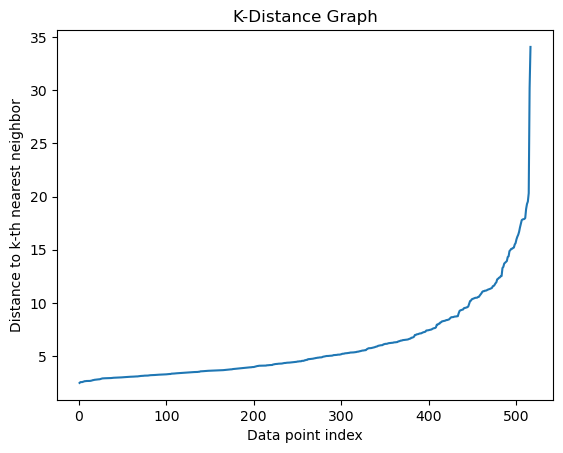

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming you have your data stored in a variable called 'data'
# Perform feature scaling if necessary

# Determine the distance to k-th nearest neighbor for each point
k = 10  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, _ = nbrs.kneighbors(X)
k_distances = np.mean(distances[:, 1:], axis=1)  # Average distance to k nearest neighbors

# Sort the distances in ascending order
sorted_distances = np.sort(k_distances)

# Plot the k-distance graph
plt.plot(np.arange(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Data point index')
plt.ylabel('Distance to k-th nearest neighbor')
plt.title('K-Distance Graph')
plt.show()


In [37]:
%%HTML
<h1>Fuzzy C Means Clustering</h1>

In [38]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

# Define the range of number of clusters (c) to experiment with
c_values = range(2, 11)

# Initialize variables to store the optimal values
best_c = None
best_score = -1

# Iterate over each number of clusters
for c in c_values:
    # Create a new Fuzzy C-means model with the current number of clusters
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, 2, error=0.005, maxiter=1000, init=None)
    
    # Compute the cluster labels
    labels = np.argmax(u, axis=0)
    
    # Evaluate the model using silhouette score
    score = silhouette_score(X, labels)
        
    # Check if the current number of clusters gives a higher silhouette score
    if score > best_score:
        best_c = c
        best_score = score

# Print the optimal number of clusters and corresponding silhouette score
print("Optimal Number of Clusters:", best_c)
print("Silhouette Score:", best_score)


Optimal Number of Clusters: 2
Silhouette Score: 0.03378514706474431


In [39]:
import skfuzzy as fuzz

# Define the number of clusters
c = 2

# Define the maximum number of iterations
max_iter = 100

# Apply Fuzzy C-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, 2, error=0.005, maxiter=max_iter, init=None)

# Get the cluster labels
labels = np.argmax(u, axis=0)

# Print the number of clusters discovered
n_clusters = len(np.unique(labels))
print("Clusters discovered: ", n_clusters)

# Assign the cluster labels to your DataFrame
df['Cluster'] = labels


Clusters discovered:  2


ValueError: Length of values (516) does not match length of index (1436020)

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Prepare your data
# Assume you have your data stored in the variable 'X'

# Step 2: Fit your DBSCAN model
# Assume you have already fitted your DBSCAN model and obtained the labels
# Stored in the variable 'labels'

# Step 3: Evaluation Metrics
# Calculate evaluation metrics for your clustering results

# Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz_score)

# Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin_score)

# Additional Evaluation Metrics
# Depending on your specific requirements, you can also calculate other evaluation metrics
# such as the Adjusted Rand Index (ARI) or the Fowlkes-Mallows Index (FMI)

In [ ]:
%%HTML
<h1>Cluster Visualization</h1>

In [ ]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

In [ ]:
clustered_series = pd.Series(index=return_data.index, data=clustered.flatten())
clustered_series_all = pd.Series(index=return_data.index, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(init = "random", learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');

In [ ]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

In [ ]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(pricing[tickers].mean())
    datas = np.log(pricing[tickers]).sub(means)
    datas.plot(title='Stock Time Series for Cluster %d' % clust)

In [ ]:
%%HTML
<h1>Pair Selection</h1>

In [ ]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

In [ ]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [ ]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(pricing[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [ ]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [ ]:
pairs

In [ ]:
%%HTML
<h1>TSNE Visualization of Pairs</h1>

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_df = pd.DataFrame(index=return_data.index, data=X)
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.loc[stocks]

X_tsne = TSNE(init = "random", learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

In [ ]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[1]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3);
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(unclean_pricing['TVD'].loc[start_date:end_date], label='TVD', color='red')
# plt.plot(unclean_pricing['MDC'].loc[start_date:end_date], label='MDC', color='yellow')

plt.plot(unclean_pricing['AAA'], label='AAA', color='blue')
plt.plot(unclean_pricing['INN'], label='INN', color='green')
plt.plot(unclean_pricing['HTC'], label='HTC', color='yellow')

plt.legend(title='Ticker')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Price Time Series of 2 Cointegrated Stocks in clustering interval and in the long run', fontsize=16)

#display plot
plt.show()